In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
path = "./ogle/"

event = "blg-0011"

df = np.loadtxt(path+event+"/phot.dat").transpose()
df[0] = df[0] - 2450000

i_mean = np.mean(df[1])

m_max, m_min = np.argmax(df[1]), np.argmin(df[1])
i_max, i_min = df[1][m_max] + df[2][m_max], df[1][m_min] - df[2][m_max]
sep = 0.1*(i_max-i_min)
print(sep)

0.10029999999999983


In [3]:
def mag(t, A, u0, t0, tE):
    u = np.sqrt(u0**2 + ((t-t0)/tE)**2)
    mag = (u**2 + 2)/(u * np.sqrt(u**2 + 4))
    mag_mag = -np.log10(mag)+1
    return A * mag_mag


guess = [np.mean(df[1]), 1.8, df[0][m_min], 5]
print(guess)

[16.03883514099783, 1.8, 8567.83564000018, 5]


In [4]:
guess = [np.mean(df[1]), 1.8, df[0][m_min], 5]

params, parms_covariance = optimize.curve_fit(mag, df[0], df[1], guess)
print(params)

[1.60989875e+01 1.56669742e+00 8.54326839e+03 3.85783018e+01]


7416.87582000019 8787.50867999997


<ErrorbarContainer object of 3 artists>

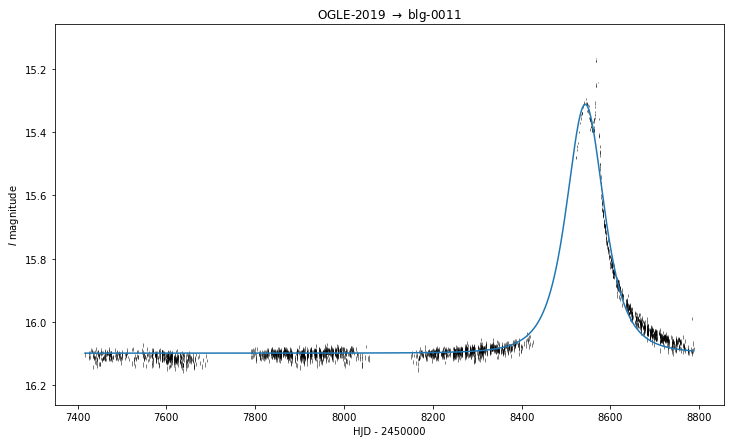

In [5]:

t = np.linspace(np.min(df[0]), np.max(df[0]), 1000)
print(np.min(df[0]), np.max(df[0]))

plt.figure(figsize=(12, 7))
# ax.plot(t, mag(t, *guess))
fit = mag(t, *params)
plt.plot(t, fit)

plt.title(r'OGLE-2019 $\rightarrow$ '+event)
plt.ylim(i_max+sep, i_min-sep)
plt.xlabel("HJD - 2450000")
plt.ylabel(r'$I$ magnitude')
plt.errorbar(df[0], df[1], df[2], fmt='none', color='black', linewidth=0.5)

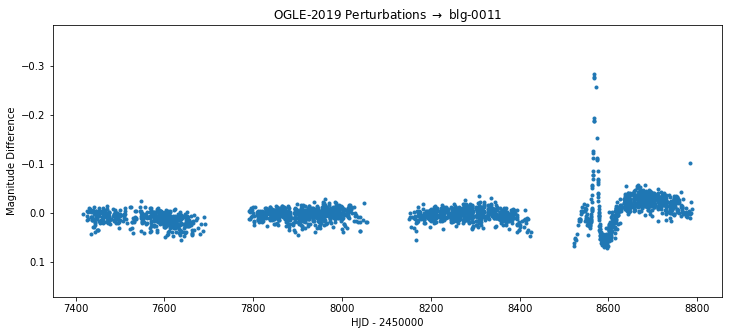

In [6]:
diff = df[1] - mag(df[0], *params)

plt.figure(figsize=(12, 5))
plt.title(r'OGLE-2019 Perturbations $\rightarrow$ '+event)
plt.ylim(np.max(diff)+sep, np.min(diff)-sep)
plt.xlabel("HJD - 2450000")
plt.ylabel(r'Magnitude Difference')
plt.scatter(df[0], df[1] - mag(df[0], *params), marker='.')

629 8279.866880000052
999 8787.50867999997


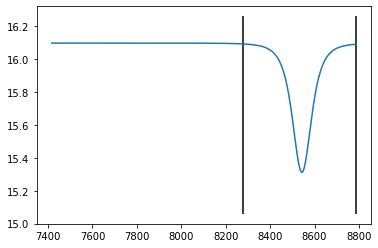

In [7]:
fit = mag(t, *params)

tb_arg, te_arg = 0, 0
tb, te = 0,0 
for i, mag in enumerate(fit):
    if fit[i-1] - mag > 0.1**4:
        tb_arg = i
        tb = t[tb_arg]
        break
print(tb_arg, tb)

for i, mag in enumerate(fit[::-1]):
    if fit[i-1] - mag > 0.1**4:
        te_arg = len(t) - i
        te = t[te_arg]
        break
print(te_arg, te)

plt.plot(t, fit)
plt.vlines([te, tb], i_max+sep, i_min-sep)
plt.show()

1551 2765
16.10377899484536


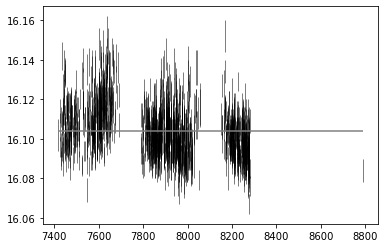

In [9]:
hjdb_arg = np.argmin(abs(df[0] - t[tb_arg]))
hjde_arg = np.argmin(abs(df[0] - t[te_arg]))
print(hjdb_arg, hjde_arg)
t_const = np.append(df[0][0:hjdb_arg], df[0][hjde_arg:])
mag_const = np.append(df[1][0:hjdb_arg], df[1][hjde_arg:])
err_const = np.append(df[2][0:hjdb_arg], df[2][hjde_arg:])
plt.errorbar(t_const, mag_const, err_const, fmt='none', linewidth=0.5, color='black')
mag_const_mean = np.mean(mag_const)
plt.hlines(mag_const_mean, np.min(t_const), np.max(t_const), color='gray')
print(mag_const_mean)
plt.show()

<ErrorbarContainer object of 3 artists>

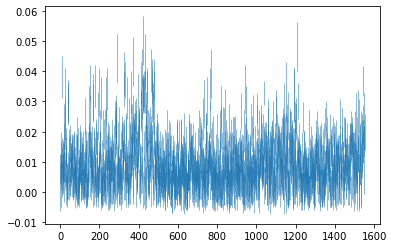

In [13]:
devs = abs(mag_const - mag_const_mean)
plt.errorbar(range(len(devs)), devs, err_const, fmt='none', linewidth=0.5)